<a href="https://colab.research.google.com/github/bnv20/Caba_dl/blob/main/DL30_overfitting_and_underfitting_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 과대적합과 과소적합
머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기이다.
- 최적화 : 훈련데이터에서 최고의 성능을 얻으려고 모델을 조정(학습)
- 일반화 : 훈련된 모델이 본적이 없는 데이터에서 얼마나 잘 수행되는지를 의미
- 과대적합 : 과다한 특성, 데이터 부족
- 과소적합 : 과소한 특성, 
- 과대적합에 대한 대책 : 더 많은 훈련 데이터, 파라미터 수 축소(단순한 모델), 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록), 훈련 데이터의 잡음을 제거(오류데이터 수정하고 이상치 제거)
- 과소적합에 대한 대책 : 더 복잡한 모델(파라미터 확대), 모델의 제약을 줄임 


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
train_data.shape
len(train_data[0])
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [11]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results


In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
# 네트워크 크기 축소

from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16,activation='relu'))
original_model.add(layers.Dense(1,activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [19]:
# 더 작은 네트워크

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6,activation='relu'))
smaller_model.add(layers.Dense(1,activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [21]:
original_hist = original_model.fit(x_train,y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 29ms/step - loss: 0.5493 - acc: 0.7440 - val_loss: 0.3365 - val_acc: 0.8818
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2671 - acc: 0.9124 - val_loss: 0.2835 - val_acc: 0.8904
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2019 - acc: 0.9317 - val_loss: 0.2831 - val_acc: 0.8876
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1636 - acc: 0.9444 - val_loss: 0.2911 - val_acc: 0.8850
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1453 - acc: 0.9524 - val_loss: 0.3095 - val_acc: 0.8799
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1215 - acc: 0.9608 - val_loss: 0.3463 - val_acc: 0.8716
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1142 - acc: 0.9612 - val_loss: 0.3555 - val_acc: 0.8726
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0998 - a

In [22]:
smaller_model_hist = smaller_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.5841 - acc: 0.7541 - val_loss: 0.4051 - val_acc: 0.8677
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3408 - acc: 0.8954 - val_loss: 0.3172 - val_acc: 0.8839
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2461 - acc: 0.9173 - val_loss: 0.2858 - val_acc: 0.8900
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2022 - acc: 0.9306 - val_loss: 0.2791 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1715 - acc: 0.9422 - val_loss: 0.2851 - val_acc: 0.8863
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1576 - acc: 0.9459 - val_loss: 0.2912 - val_acc: 0.8852
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1360 - acc: 0.9562 - val_loss: 0.3014 - val_acc: 0.8835
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1252 - a

In [25]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

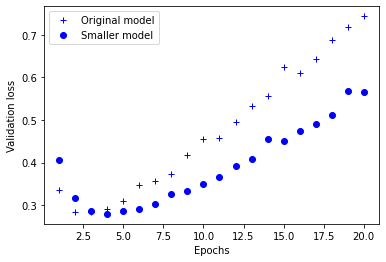

In [26]:
import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [27]:
# 더 큰 네트워크
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024,activation='relu'))
bigger_model.add(layers.Dense(1,activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 31ms/step - loss: 0.7643 - acc: 0.7038 - val_loss: 0.2990 - val_acc: 0.8760
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2333 - acc: 0.9059 - val_loss: 0.3048 - val_acc: 0.8728
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1121 - acc: 0.9601 - val_loss: 0.2960 - val_acc: 0.8866
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0463 - acc: 0.9893 - val_loss: 0.4281 - val_acc: 0.8853
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0034 - acc: 0.9994 - val_loss: 1.2536 - val_acc: 0.8212
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3927 - acc: 0.9524 - val_loss: 0.5897 - val_acc: 0.8850
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 1.5148e-04 - acc: 1.0000 - val_loss: 0.7543 - val_acc: 0.8838
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 1.3277

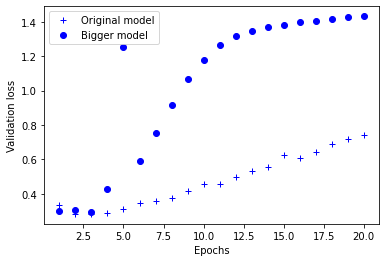

In [28]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

용량이 큰 네트워크는 첫번째 에포크 이후 바로 과대적합이 시작되어 갈수록 심해진다. 

## 가중치 규제 추가
- L1 규제 : 가중치의 절대값에 비례하는 비용이 추가(가중치의 L1 노름)
- L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(가중치의 L2 노름) - 가중치 감쇠라고도 함

In [31]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1,activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss= 'binary_crossentropy',
                 metrics=['acc'])

In [32]:
l2_model_hist = l2_model.fit(x_train,y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 28ms/step - loss: 0.6221 - acc: 0.7434 - val_loss: 0.4092 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3500 - acc: 0.9007 - val_loss: 0.3461 - val_acc: 0.8844
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2778 - acc: 0.9196 - val_loss: 0.3325 - val_acc: 0.8869
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2528 - acc: 0.9295 - val_loss: 0.3389 - val_acc: 0.8844
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2395 - acc: 0.9321 - val_loss: 0.3399 - val_acc: 0.8841
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2255 - acc: 0.9410 - val_loss: 0.3470 - val_acc: 0.8827
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2232 - acc: 0.9403 - val_loss: 0.3557 - val_acc: 0.8807
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2073 - a

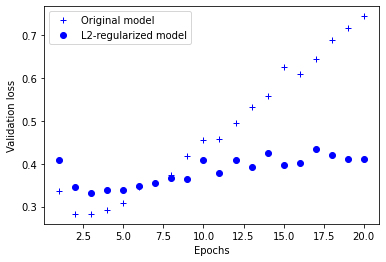

In [33]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델이 기본 모델 보다 훨씬 더 과대적합에 잘 견디고 있다.

In [ ]:
# L1 규제
l1(0.0001) 모델과 비교

In [ ]:
# L1 과 L2 규제 병행
l1_l2(l1=0.0001,l2=0.0001) 모델과 비교